In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
import pandas_profiling as pdf
from sklearn.model_selection import TimeSeriesSplit

In [19]:
df_train_iden = pd.read_csv('../input/train_identity.csv')
df_train_trans = pd.read_csv('../input/train_transaction.csv')
df_test_iden = pd.read_csv('../input/test_identity.csv')
df_test_trans = pd.read_csv('../input/test_transaction.csv')

df_train = pd.merge(df_train_trans, df_train_iden, on='TransactionID', how='left')
df_test = pd.merge(df_test_trans, df_test_iden, on='TransactionID', how='left')

In [45]:
splits = TimeSeriesSplit(n_splits=5)

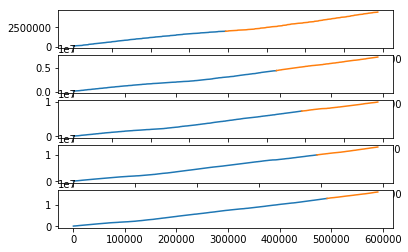

In [47]:
index = 1
for train_index,test_index in splits.split(df_train):
    X_train = df_train['TransactionDT'][train_index]
    X_test = df_train['TransactionDT'][test_index]
    plt.subplot(510 + index)
    plt.plot(X_train)
    plt.plot([None for i in X_train]+[x for x in X_test])
    index += 1

In [49]:
len(df_train)/6

98423.33333333333

In [69]:
train_start_index = 0
train_end_index = int(len(df_train)/2)
skip = int(len(df_train)/6)
horizon = int(len(df_train)/6)

SPLITS = 3
for split in range(SPLITS):
    test_start_index = train_end_index
    test_end_index = test_start_index + horizon
    
    X_train = df_train[train_start_index:train_end_index]
    X_test = df_train[test_start_index:test_end_index]
    
    train_start_index += skip
    train_end_index += skip
    print(X_train.index)
    print(X_test.index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            295260, 295261, 295262, 295263, 295264, 295265, 295266, 295267,
            295268, 295269],
           dtype='int64', length=295270)
Int64Index([295270, 295271, 295272, 295273, 295274, 295275, 295276, 295277,
            295278, 295279,
            ...
            393683, 393684, 393685, 393686, 393687, 393688, 393689, 393690,
            393691, 393692],
           dtype='int64', length=98423)
Int64Index([ 98423,  98424,  98425,  98426,  98427,  98428,  98429,  98430,
             98431,  98432,
            ...
            393683, 393684, 393685, 393686, 393687, 393688, 393689, 393690,
            393691, 393692],
           dtype='int64', length=295270)
Int64Index([393693, 393694, 393695, 393696, 393697, 393698, 393699, 393700,
            393701, 393702,
            ...
            492106, 492107, 492108, 492109, 492110, 492111, 492112, 492113,
       

In [64]:
X_train.index

Int64Index([196846, 196847, 196848, 196849, 196850, 196851, 196852, 196853,
            196854, 196855,
            ...
            492106, 492107, 492108, 492109, 492110, 492111, 492112, 492113,
            492114, 492115],
           dtype='int64', length=295270)

In [65]:
X_test.index

Int64Index([492116, 492117, 492118, 492119, 492120, 492121, 492122, 492123,
            492124, 492125,
            ...
            590529, 590530, 590531, 590532, 590533, 590534, 590535, 590536,
            590537, 590538],
           dtype='int64', length=98423)

In [66]:
df_train.shape

(590540, 434)

In [4]:
df_train = pd.read_csv('../src/make_data/data/003_train.csv',index_col='TransactionID')
df_test = pd.read_csv('../src/make_data/data/003_test.csv',index_col='TransactionID')

In [9]:
df_train['day']

0         2
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
590510    1
590511    1
590512    1
590513    1
590514    1
590515    1
590516    1
590517    1
590518    1
590519    1
590520    1
590521    1
590522    1
590523    1
590524    1
590525    1
590526    1
590527    1
590528    1
590529    1
590530    1
590531    1
590532    1
590533    1
590534    1
590535    1
590536    1
590537    1
590538    1
590539    1
Name: day, Length: 590540, dtype: int64

In [12]:
import pickle
import xgboost as xgb

In [16]:
filename = '../model/003_xgb.sav'
loaded_model = pickle.load(open(filename,'rb'))
df_train = pd.read_csv('../src/make_data/data/003_train.csv',index_col='TransactionID')

In [20]:
fti = loaded_model.feature_importances_
train = df_train.drop('isFraud',axis=1)

In [25]:
dict = {"feat":np.arange(0,len(train.columns)) , 'importance': np.arange(0,len(train.columns),dtype=float)}
df_feat_imp = pd.DataFrame(dict)
for i,feat in enumerate(train.columns):
    df_feat_imp['feat'][i] = feat
    df_feat_imp['importance'][i] = loaded_model.feature_importances_[i]

df_feat_imp = df_feat_imp.sort_values(by='importance',ascending=True)

# drop_list = list(df_feat_imp['feat'].head(10))

/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
df_feat_imp.to_csv('../src/make_data/data/fti_list.csv',index=False)

In [30]:
fti = pd.read_csv('../src/make_data/data/fti_list.csv')

In [32]:
fti_drop_list = list(df_feat_imp['feat'].head(30))

In [33]:
fti_drop_list

['V89',
 'V27',
 'V28',
 'V1',
 'V41',
 'V305',
 'V65',
 'V68',
 'V88',
 'V107',
 'V120',
 'V14',
 'id_35',
 'id_27',
 'V241',
 'V240',
 'V117',
 'V325',
 'V119',
 'V113',
 'V142',
 'V32',
 'id_23',
 'V328',
 'V269',
 'V31',
 'V122',
 'V71',
 'id_22',
 'V21']

In [35]:
fti.head(30)

,feat,importance
0,V89,0.000000
1,V27,0.000000
2,V28,0.000000
3,V1,0.000000
4,V41,0.000000
5,V305,0.000000
6,V65,0.000000
7,V68,0.000000
8,V88,0.000000
9,V107,0.000000


/anaconda3/envs/mlpy36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


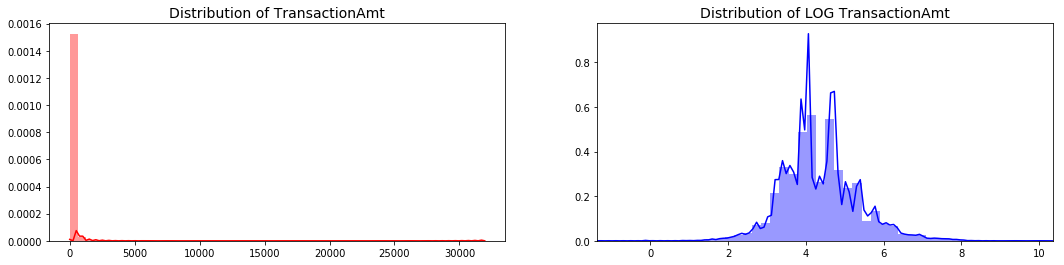

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = df_train['TransactionAmt'].values

sns.distplot(time_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionAmt', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax=ax[1], color='b')
ax[1].set_title('Distribution of LOG TransactionAmt', fontsize=14)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

(array([4.00000e+01, 3.42000e+02, 4.69500e+03, 5.91500e+04, 2.69842e+05,
        2.01201e+05, 4.64860e+04, 8.42600e+03, 3.56000e+02, 2.00000e+00]),
 array([-1.38230234, -0.20691883,  0.96846467,  2.14384818,  3.31923169,
         4.4946152 ,  5.6699987 ,  6.84538221,  8.02076572,  9.19614923,
        10.37153273]),
 <a list of 10 Patch objects>)

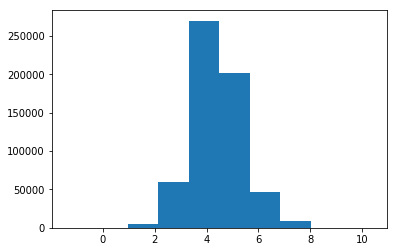

In [39]:
plt.hist(np.log(df_train['TransactionAmt']))